3장

1

In [12]:
import torch

# 1
a = torch.tensor(list(range(9)))
print(a, a.size(), a.storage_offset(), a.stride())

# 1-a
b = a.view(3,3)
print(id(a.storage()) == id(b.storage()))

c = b[1:,1:]
print(c, c.size(), c.storage_offset(), c.stride())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8]) torch.Size([9]) 0 (1,)
True
tensor([[4, 5],
        [7, 8]]) torch.Size([2, 2]) 4 (3, 1)


4장

1-a     

각 이미지를 읽어 텐서로 변환하라

In [4]:
import torch
import imageio
from PIL import Image


def image_to_tensor(img_path):
    img_arr = imageio.imread(img_path)
    img = torch.tensor(img_arr.tolist())
    img = img.permute(2,0,1).float()
    img = img[:3]                                   #알파 채널 제거
    return img

red_img = image_to_tensor("D:\\pytorch\\data\\image\\4practice\\red.png")
print(f'red {red_img.shape}')

green_img = image_to_tensor("D:\\pytorch\\data\\image\\4practice\\green.png")
print(f'green {green_img.shape}')

blue_img = image_to_tensor("D:\\pytorch\\data\\image\\4practice\\blue.png")
print(f'blue {blue_img.shape}')

C:\Users\user\AppData\Local\Temp\ipykernel_14576\2213043100.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(img_path)


red torch.Size([3, 107, 78])
green torch.Size([3, 151, 360])
blue torch.Size([3, 360, 360])


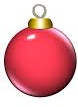

In [5]:
Image.open("D:\\pytorch\\data\\image\\4practice\\red.png")

1-b 

각 이미지 텐서에 대해 .mean() 메소드를 사용해 이미지가 얼마나 밝은지 확인하라

In [29]:
red_bright = red_img.mean()
print(f'red bright {red_bright}')

green_bright = green_img.mean()
print(f'green bright {green_bright}')

blue_bright = blue_img.mean()
print(f'blue bright {blue_bright}')

red bright 181.5168914794922
green bright 134.91372680664062
blue bright 201.5252685546875


1-c 

이미지의 각 체널 평균을 구해보라. 채널 평균값만으로 빨간색, 파란색, 초록색 물건을 구별할 수 있는가

In [30]:
red_channel_means = red_img.mean(dim=(1,2))
green_channel_means = green_img.mean(dim=(1,2))
blue_channel_means = blue_img.mean(dim=(1,2))
print(f'red channel manes {red_channel_means}\ngreen channel means {green_channel_means}\nblue channel means {blue_channel_means}')

red channel manes tensor([227.9025, 155.1385, 161.5097])
green channel means tensor([ 99.2177, 180.2163, 125.3071])
blue channel means tensor([183.6869, 189.4788, 231.4102])


2-a 

파이썬 소스 파일의 모든 단어에 대한 인덱스를 만들어라(단어 구분 방식은 단순하게 만들어도 되고 원하는 만큼 복잡하게 해도 된다. r"[^a-zA-Z0-9_]+"을 공백으로 치환하는 것부터 시작하면 좋을 것이다)

In [40]:
import re
from collections import defaultdict

def create_word_index(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # 정규 표현식을 사용하여 단어를 추출
    words = re.split(r"[^a-zA-Z0-9_]+", text)
    
    # 단어 인덱스 생성
    word_index = defaultdict(list)
    for i, word in enumerate(words):
        if word:  # 빈 문자열은 제외
            word_index[word.lower()].append(i)
    
    return word_index

# 파이썬 소스 코드 파일 경로
python_file_path = "D:\\pytorch\\data\\4practice.py"

# 단어 인덱스 생성
python_word_index = create_word_index(python_file_path)

# 단어 수 출력
print(f'Number of unique words in Python file: {len(python_word_index)}')


Number of unique words in Python file: 48


defaultdict(list,
            {'def': [0, 8, 16, 57, 124, 144],
             'convert_to_int': [1, 92, 96],
             'a': [2,
              5,
              10,
              13,
              18,
              22,
              31,
              40,
              42,
              49,
              59,
              64,
              67,
              71,
              72,
              87,
              93,
              146,
              158,
              166],
             'return': [3, 11, 25, 32, 46, 53, 55, 120, 139, 151, 157, 190],
             'ord': [4, 6, 14],
             '0': [7,
              15,
              56,
              68,
              74,
              81,
              105,
              112,
              128,
              136,
              143,
              150,
              159,
              170,
              175],
             'convert_to_char': [9, 115, 183],
             'chr': [12],
             'compare': [17, 172],
             'b': [19,
 

2-b

오만과 편견에서 만든 색인과 비교해보자. 어떤 것이 더 큰가

In [38]:
# 오만과 편견

with open("D:\\pytorch\\data\\pytorch-master\\data\\p1ch4\\jane-austen\\1342-0.txt",encoding='utf8') as f:
    text = f.read()
    
def clean_words(input_str):
    punctuation = '.,;:"!?“”_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i,word) in enumerate(word_list)}

import torch

def create_one_hot_tensor(word_list, word2index_dict):
    vocab_size = len(word_list)
    one_hot_tensor = torch.zeros((vocab_size, vocab_size), dtype=torch.float32)
    
    for word, index in word2index_dict.items():
        one_hot_tensor[index, index] = 1.0
    
    return one_hot_tensor

one_hot_tensor = create_one_hot_tensor(word_list, word2index_dict)
one_hot_tensor, one_hot_tensor.shape


(tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 torch.Size([7261, 7261]))